<a href="https://colab.research.google.com/github/SunWeb07/mytimetodosomething/blob/master/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import librabries and get dataset

In [36]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import re
import warnings
# read the Excel file into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Major_Project/WPP2022_Demographic_Indicators_Medium.csv')

Main_df = df[['Location', 'Time','TPopulation1Jan','TPopulation1July','TPopulationMale1July','TPopulationFemale1July','PopSexRatio','Births','CBR']]

Main_df = Main_df[(Main_df['Time'] >= 1950) & (Main_df['Time'] <= 2022)]

locations = set(Main_df['Location'].tolist())
times = set(Main_df['Time'].tolist())
print(locations,times)

{'Less developed regions, excluding China', 'Micronesia (Fed. States of)', 'Turkmenistan', 'Switzerland', 'Marshall Islands', 'Lower-middle-income countries', 'Eastern Africa', 'Turks and Caicos Islands', 'Romania', 'Guernsey', 'Bhutan', 'Europe', 'Montserrat', 'Caribbean', 'Jordan', 'Timor-Leste', 'Venezuela (Bolivarian Republic of)', 'Central Asia', 'Vanuatu', 'Montenegro', 'Gambia', 'Cuba', 'Portugal', 'Gibraltar', 'Germany', "Lao People's Democratic Republic", 'Zambia', 'Bolivia (Plurinational State of)', 'United States of America', 'Asia', 'Liberia', 'Low-income countries', 'Angola', 'Bahamas', 'Dominica', 'Brazil', 'Malaysia', 'Greece', 'Tokelau', 'Tunisia', 'Western Asia', 'Denmark', 'Southern Asia', 'Nauru', 'Malta', 'Algeria', 'Libya', 'India', "Côte d'Ivoire", 'Eritrea', 'Kiribati', 'Morocco', 'Armenia', 'Saint Kitts and Nevis', 'Australia/New Zealand', 'Gabon', 'Europe and Northern America', 'Qatar', 'Paraguay', 'Republic of Korea', 'Benin', 'Yemen', 'Guadeloupe', 'Zimbabwe'

<ipython-input-36-f5090e772e9d>:10: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



In [7]:
print(Main_df['Time'])

0        1950
1        1951
2        1952
3        1953
4        1954
         ... 
43388    2018
43389    2019
43390    2020
43391    2021
43392    2022
Name: Time, Length: 20878, dtype: int64


#**Check if data contains any missing or error value**

In [8]:

Main_df
if Main_df.isna().any().any():
    print("The dataframe contains missing values")
else:
    print("The dataframe does not contain missing values")

The dataframe does not contain missing values


#Visualize data

<Axes: >

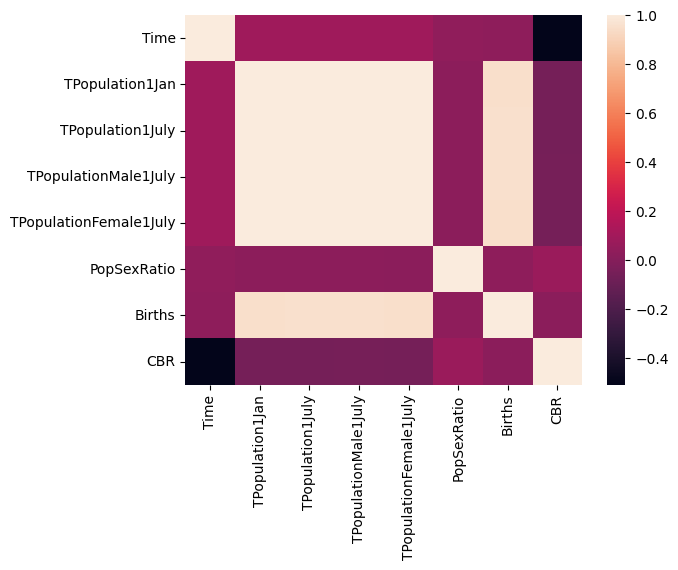

In [11]:

sns.heatmap(Main_df.corr())

<Axes: xlabel='TPopulation1Jan', ylabel='Time'>

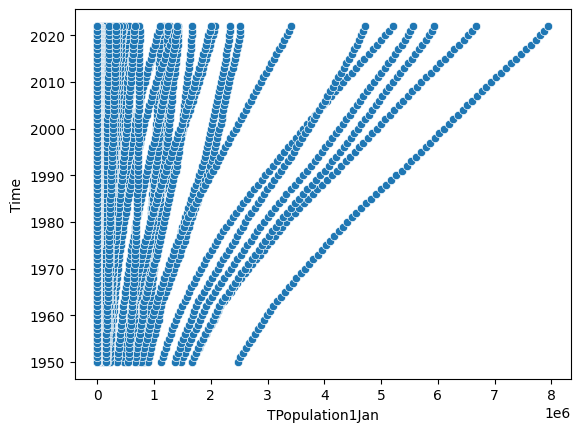

In [12]:
sns.scatterplot(x='TPopulation1Jan', y='Time', data=Main_df)

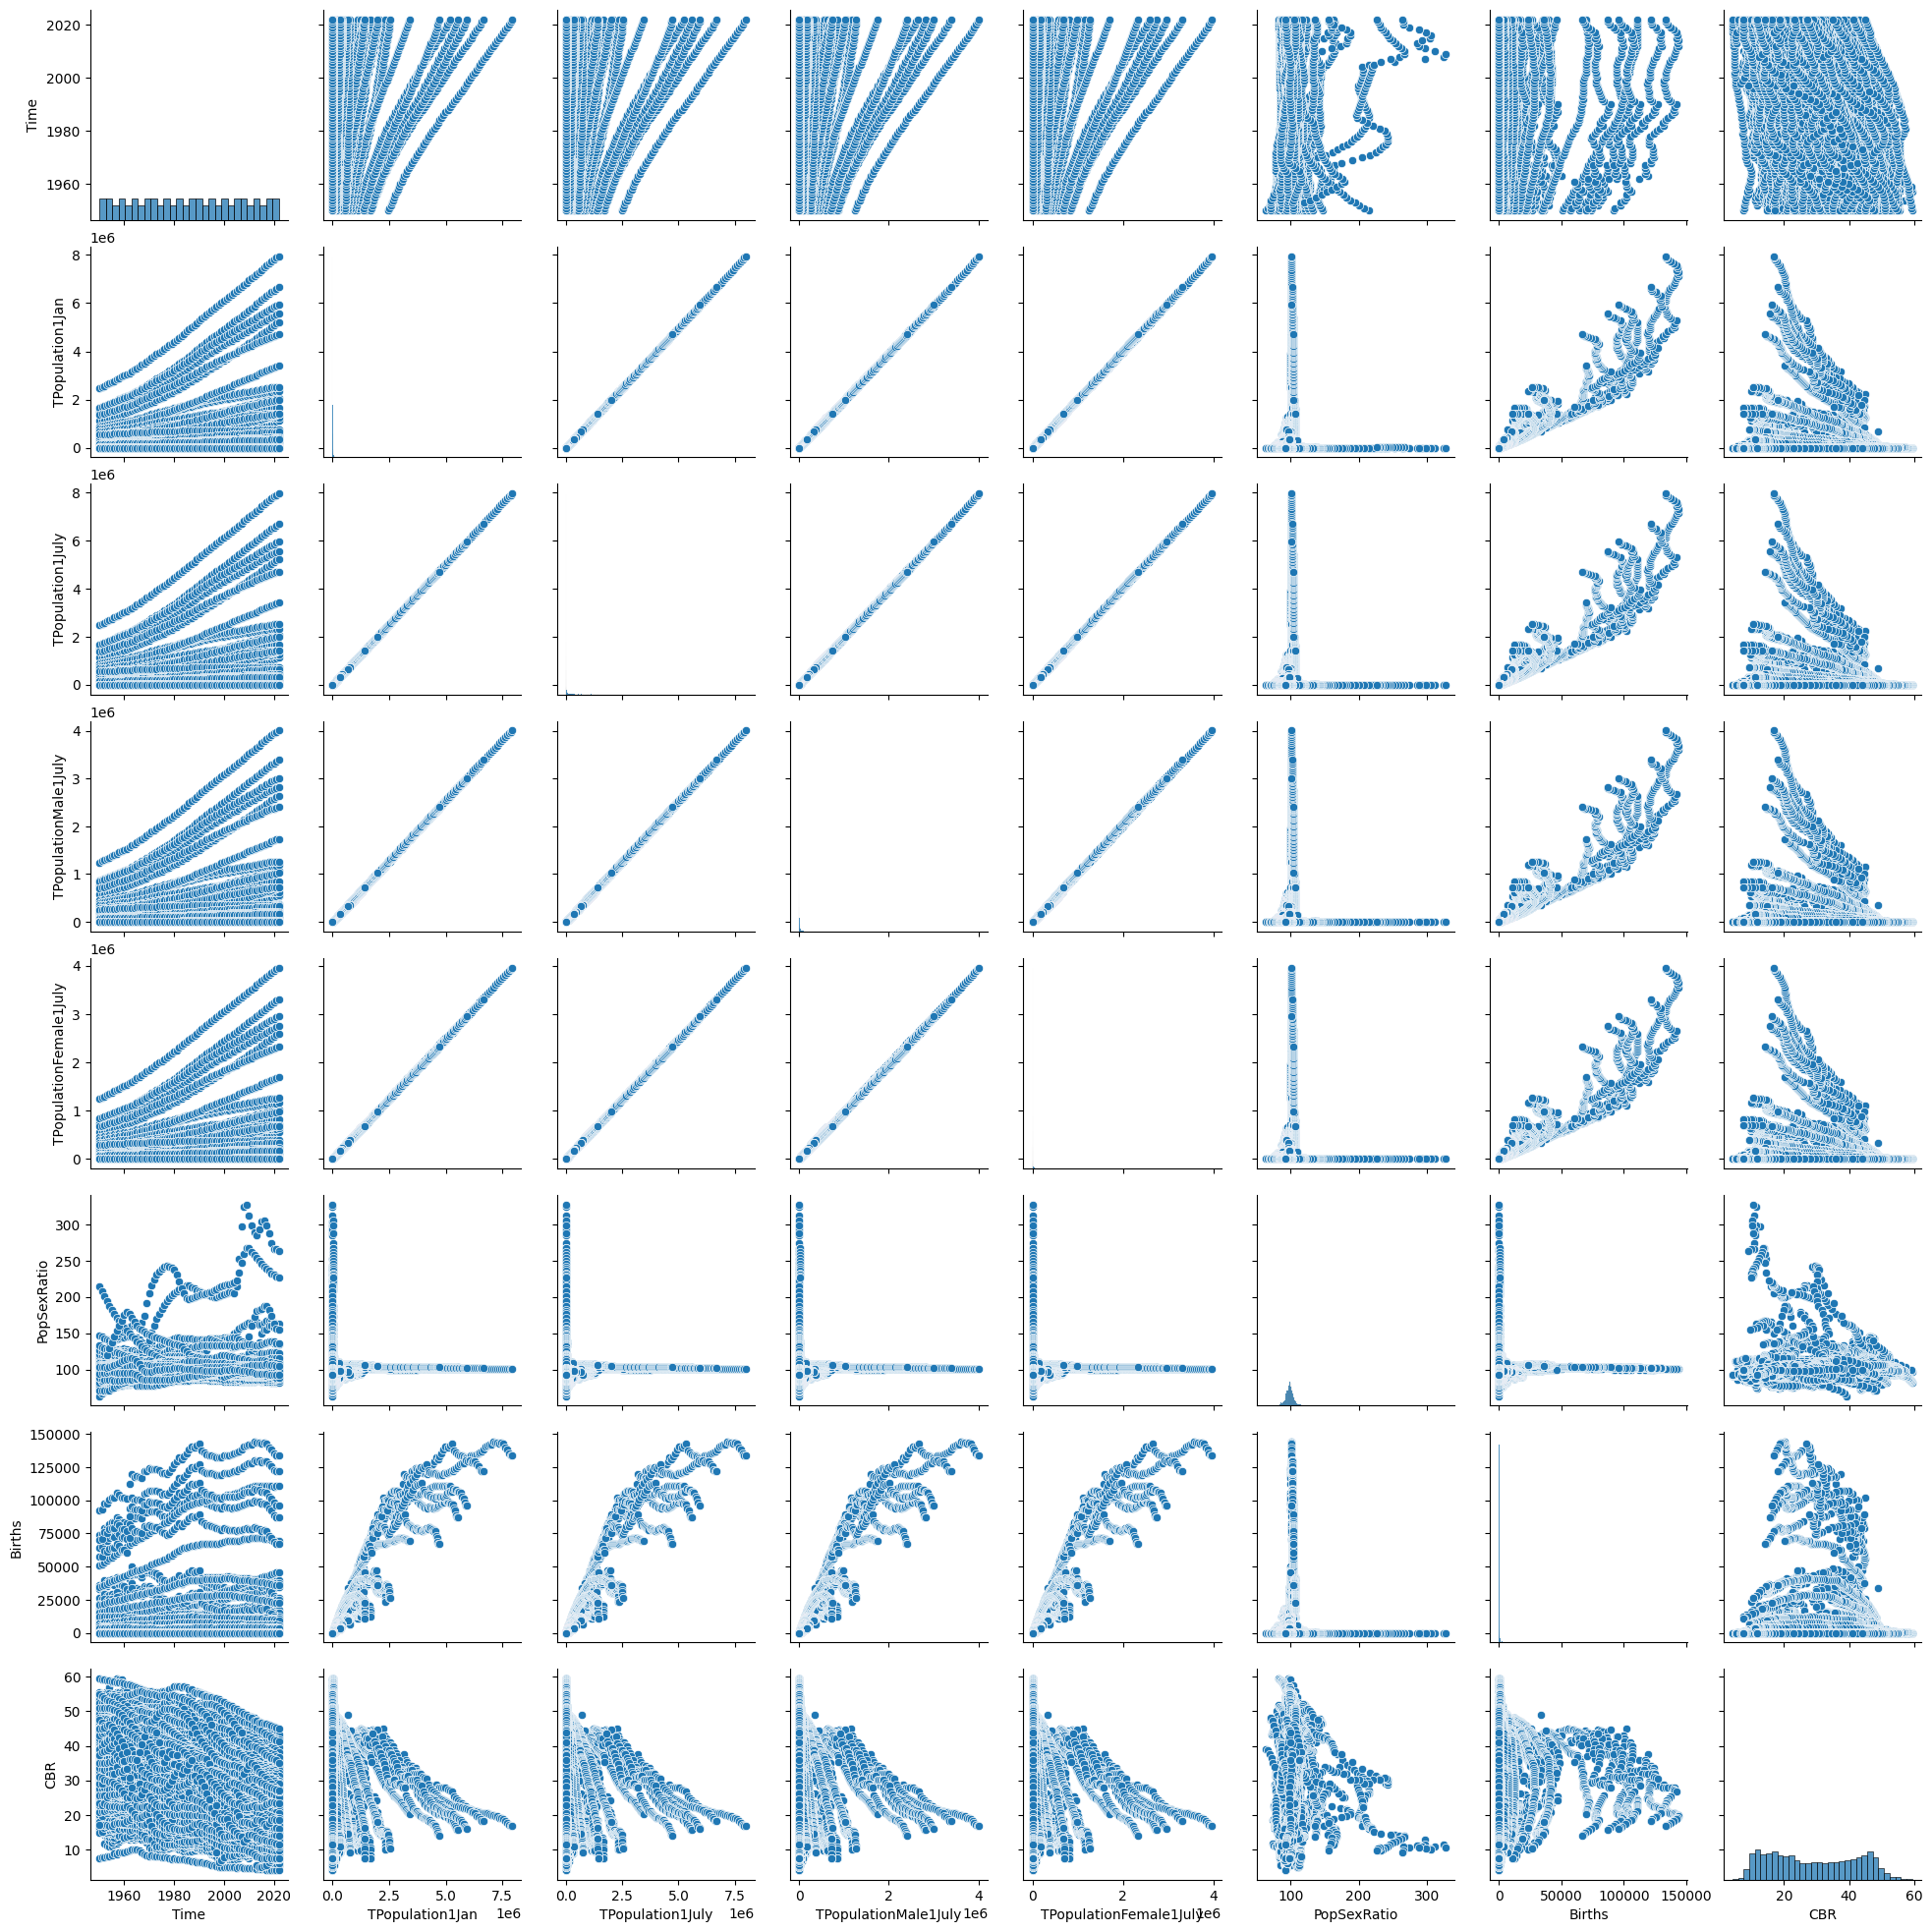

In [13]:
sns.pairplot(Main_df)

In [26]:
fig = px.scatter(Main_df, x='TPopulation1Jan', y='Time',color='Location')
fig.show()

In [33]:
country = 'India'
df_country = Main_df[Main_df['Location'] == country]


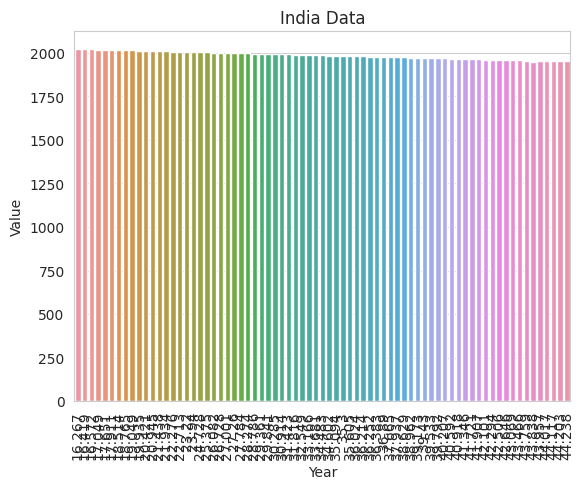

In [35]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a bar chart of the data using Seaborn
sns.barplot(x='CBR', y='Time', data=df_country)

# Set the title and axis labels
plt.title(f'{country} Data')
plt.xlabel('Year')
plt.ylabel('Value')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [24]:
fig = px.scatter(Main_df, x='PopSexRatio', y='Time',color='Location')
fig.show()

#apply prediction on population

In [42]:


warnings.filterwarnings("ignore")



def selecting_country(df,country):
    """
    this function will 
    """
    df = df.loc[df['Location']==country]
    df.drop(['Location'],axis=1,inplace=True)
    df = df.T
    df.dropna(inplace=True)
    df = df.reset_index()
    return df

def prediction_model(df):
    
    x = df.iloc[:, 0].values.reshape(-1,1)
    y = df.iloc[:, 1].values.reshape(-1,1)
    model = LinearRegression().fit(x,y)
    return model

def prediction(model, year):
    return int(model.coef_[0][0] * year + model.intercept_[0])


def main():
    country = input("Please input the country name: ")
    year = int(input("Please input the year to predict: "))
    
    
    if country in locations:
        df = selecting_country(Main_df, country)
        model = prediction_model(df)
        result = prediction(model,year)
        print(f"\n Result: {country.upper()} population in {year} will be {result:,d}")
    else:
        print('kindly check available country name and thier spelling from country_list.json')
    
if __name__ == "__main__":
    main()

Please input the country name: India
Please input the year to predict: 2023
                    index
0                    Time
1         TPopulation1Jan
2        TPopulation1July
3    TPopulationMale1July
4  TPopulationFemale1July
5             PopSexRatio
6                  Births
7                     CBR


IndexError: ignored